In [12]:
import numpy as np
import pandas as pd


pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [13]:
df = pd.read_csv("data/data_merge.csv")

In [14]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler(with_mean=False)
ohe= OneHotEncoder(handle_unknown="ignore")

preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("svd", TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3,random_state=42))
])

pca_value = pca.fit_transform(df[num_columns+cat_columns])

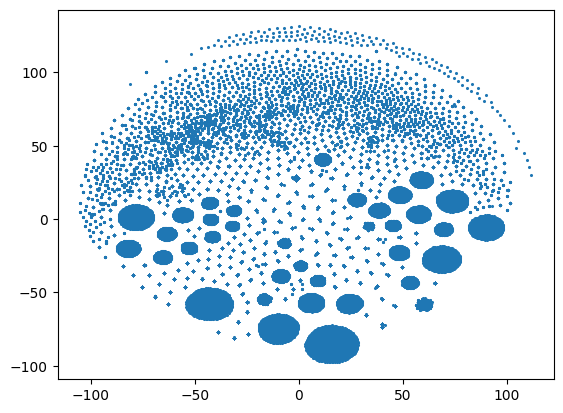

In [16]:
import matplotlib.pyplot as plt

plt.scatter(pca_value[:,0],pca_value[:,1],marker=".",s=6)
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,init="random",n_init=1000,random_state=42).fit(pca_value)


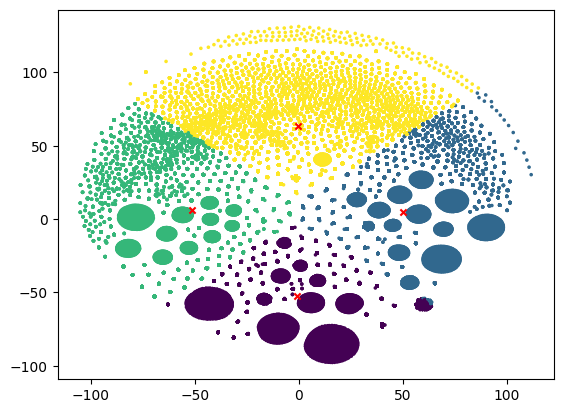

In [18]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=kmeans.labels_,marker=".",s=10)
for center in kmeans.cluster_centers_:
    plt.scatter(center[0],center[1],marker='x',c="r",s=20)

In [19]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.175, min_samples=50,n_jobs=-1).fit(pca_value)
clustering.labels_

array([ -1,  -1,   0, ...,  -1, 162, 112])

In [20]:
np.unique(clustering.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

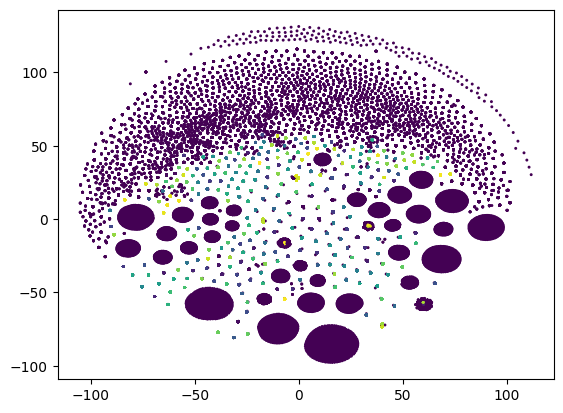

In [21]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=clustering.labels_,marker=".",s=5)
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', scaler, num_columns)
    ]
)

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 6, iteration: 1/100, moves: 4492, ncost: 900863.2136721484
Run: 8, iteration: 1/100, moves: 8471, ncost: 754147.3773014626
Run: 2, iteration: 1/100, moves: 29030, ncost: 765540.8425847406
Run: 3, iteration: 1/100, moves: 38382, ncost: 755179.8654394218
Run: 7, iteration: 1/100, 

array([2, 0, 1, ..., 1, 2, 1], dtype=uint16)

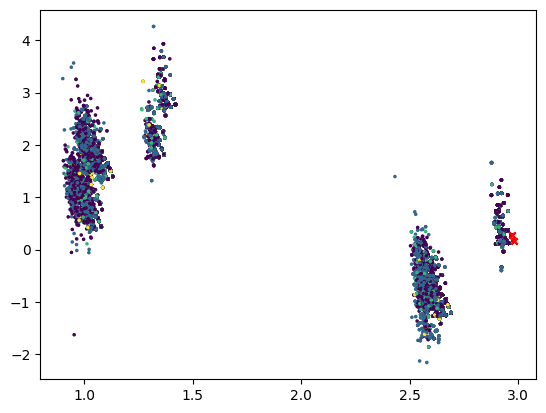

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)